In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
sizes = np.load("../results/eurosat_size_vs_performance_sizes.npy")

In [3]:
model_names = [
    "resnet50_pretrained_moco",
    "resnet50_pretrained_imagenet",
    "resnet50_randominit",
    "resnet18_pretrained_moco",
]

True resnet50_pretrained_moco 0.9542592592592593
True resnet18_pretrained_moco 0.9424074074074074
False resnet50_pretrained_moco 0.9337037037037037
False resnet18_pretrained_moco 0.9161111111111111
True resnet50_pretrained_imagenet 0.9166666666666666
True resnet50_randominit 0.7394444444444445
False resnet50_pretrained_imagenet 0.899074074074074
False resnet50_randominit 0.8642592592592593


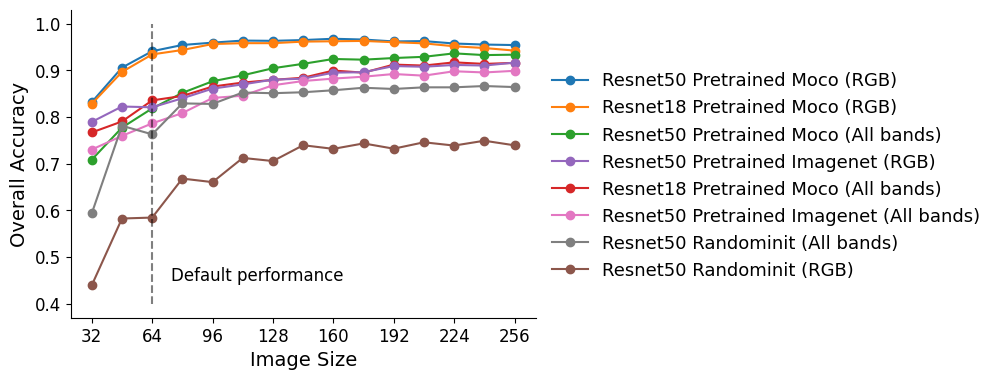

In [4]:
plt.figure(figsize=(6, 4))

data_list = []
for preprocess_method in ["divide", "standardization", "minmax"]:
    for rgb in [True, False]:
        for model_name in model_names:

            if "moco" in model_name and preprocess_method != "divide":
                continue
            elif "pretrained_imagenet" in model_name and preprocess_method != "standardization":
                continue
            elif "resnet50_randominit" in model_name and preprocess_method != "standardization":
                continue

            data = np.load(f"../results/eurosat_size_vs_performance-{model_name}-{rgb}-{preprocess_method}.npy")
            name = model_name.replace("_", " ").title()# + f" ({preprocess_method.title()})"
            if rgb:
                name += " (RGB)"
            else:
                name += " (All bands)"
            plt.plot(sizes, data, marker="o", label=name)
            data_list.append(data)
            print(rgb, model_name, data[-1])

# add default performance line
plt.vlines(64, 0.4, 1.0, linestyle="--", color="black", alpha=0.5)
plt.annotate(f"Default performance", (64, 0.5), xytext=(64 + 10, 0.45), fontsize=12)

# remove right and top spines
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# xticks multiples of 32
plt.xticks(np.arange(32, 256 + 1, 32), fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Overall Accuracy", fontsize=14)
plt.xlabel("Image Size", fontsize=14)

# add legend off right side
# sort legend by order of performance
handles, labels = ax.get_legend_handles_labels()
order = np.argsort([data[-1] for data in data_list])[::-1]
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]
plt.legend(
    handles,
    labels,
    bbox_to_anchor=(1.0, 0.85),
    loc="upper left",
    fontsize=13,
    frameon=False,
)

plt.show()
plt.close()

In [5]:
columns = {
    "Model": [],
    "Preprocessing": [],
    "Bands": [],
    "Size": [],
    "Overall Accuracy": [],
    "Feature Postprocessing": [],
}
for standard_scaling in [True, False]:
    for preprocess_method in ["divide", "standardization", "minmax"]:
        for rgb in [True, False]:
            for model_name in model_names:

                if standard_scaling:
                    data = np.load(f"../results/standard_scaling/eurosat_size_vs_performance-{model_name}-{rgb}-{preprocess_method}.npy")
                else:
                    data = np.load(f"../results/eurosat_size_vs_performance-{model_name}-{rgb}-{preprocess_method}.npy")
                name = model_name.replace("_", " ").replace("randominit", "Random").title()
                if rgb:
                    columns["Bands"].append("RGB")
                    columns["Bands"].append("RGB")
                else:
                    columns["Bands"].append("All")
                    columns["Bands"].append("All")

                columns["Model"].append(name)
                columns["Model"].append(name)
                columns["Preprocessing"].append(preprocess_method.title())
                columns["Preprocessing"].append(preprocess_method.title())

                columns["Size"].append(64)
                columns["Size"].append(256)

                columns["Overall Accuracy"].append(data[1])
                columns["Overall Accuracy"].append(data[-1])

                columns["Feature Postprocessing"].append("Standard Scaling" if standard_scaling else "None")
                columns["Feature Postprocessing"].append("Standard Scaling" if standard_scaling else "None")
df = pd.DataFrame(columns)

In [11]:
df.to_csv("../results/eurosat_size_vs_performance.csv", index=False)